# Generar Ji-cuadradas con Normales estandar

Si $Z_i\sim\mathcal{N}(0,1)$, tenemos que $$X:=\sum_{i=1}^{n}Z_i^2$$
se distribuye como $$X\sim\chi^2_{(n)}$$ donde $n\in\mathbb{N}$

Usaremos el teorema anterior para la simulación.

In [1]:
import numpy as np
import seaborn as sns
from scipy.special import gamma
sns.set_theme()

In [2]:
def ji_cuad(n:int) -> float:
    normales = [np.power(np.random.normal(),2) for _ in range(n)] #Primero generamos las muestras normales y las elevamos al cuadrado
    ji = np.sum(normales)
    return ji

def density_ji(x, k):
    if x>=0:# Tengo que poner el = aqui porque de otra forma solo me da 0
        constant = 1 / (2**(k/2)*gamma(k/2))
        expon = np.exp(-x/2)
        resultado = constant * x**(k/2-1) * expon
        return resultado
    else:
        return 0
density_ji = np.vectorize(density_ji)

Graficando las muestras resulta en

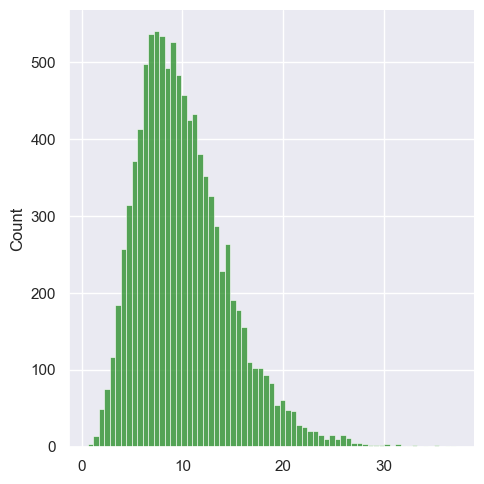

In [3]:
n = 10
cantidad = 10000
muestra = [ji_cuad(n) for i in range(cantidad)]
sns.displot(data=muestra, color='forestgreen')# ,kde=True

Analizando el eje Y podemos ver que se cuentan las apariciones de las muestra en un cierto intervalo del eje X, lo que resulta en que los valores en el eje Y son grandes y no corresponden a la función de densidad de una Ji-Cuadrada. Para ajustarlo a la escala de la función de densidad debemos de configurar el argumento `kde` o `stat`, lo cual normaliza el histograma (el area bajo la curva se aproximará a $1$) y ya lo podemos comparar con la función de densidad de la Ji-Cuadrada

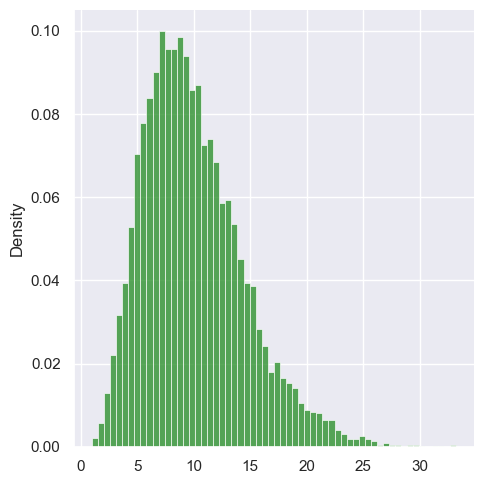

In [4]:
n = 10
cantidad = 10000
muestra = [ji_cuad(n) for i in range(cantidad)]
sns.displot(data=muestra, stat="density", color='forestgreen')# ,kde=True

Compararemos el kde con la funcion de densidad de la distribucion ji-cuadrada

<Axes: ylabel='Density'>

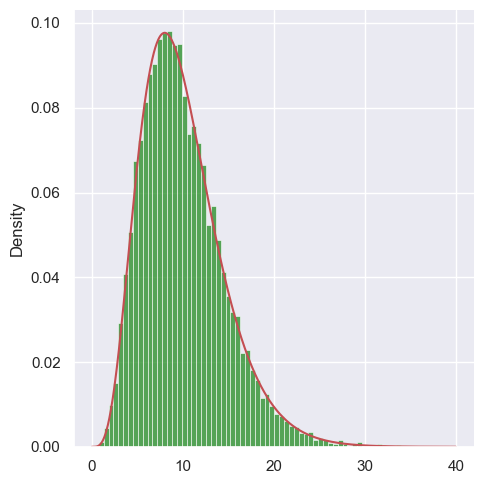

In [5]:
n = 10
cantidad = 10000
muestra = [ji_cuad(n) for i in range(cantidad)]
sns.displot(data=muestra, stat="density", color='forestgreen')# ,kde=True
# Compararemos el kde con la funcion de densidad
X = np.linspace(0,40,1000)
Y = density_ji(X, n)
sns.lineplot(x=X, y=Y, color='r')